## 파일 열기
- 옵션
    - r : read 전용
    - w : write 전용(기존 파일을 w로 열면 내용이 지워지니 주의)
    - a : 덧붙여쓰기 용도로 열기(append)
```python
with open("a.txt", "r", encoding="UTF-8") as f:
    contents = f.read()
lines = contents.splitlines()
for i, line in enumerate(lines):
    print(f"{i}: {line}")
```
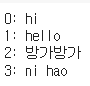


## 파일 쓰기
- 구구단 2단을 파일로 저장하기
- 한글이 들어갈 경우 open()에 encoding="UTF-8"추가
```python
text = "[2단]\n"
for i in range(1, 10):
    text += f"2 x {i} = {2*i}\n"
with open("gugudan.txt", "w", encoding="utf-8") as f:
    f.write(text)
```
- 이어 쓰기
```python
text = "[3단]\n"
for i in range(1, 10):
    text += f"3 x {i} = {3*i}\n"
with open("gugudan.txt", "a", encoding="utf-8") as f:
    f.write(text)
```

In [ ]:
# 활용 예시 - 추출 내용 txt로 저장
import requests, re
url = "https://www.inje.ac.kr/kor/Template/Bsub_page.asp?Ldir=board/S_Food&Lpage=s_food_view"
response = requests.get(url, verify=False)
page = response.text
menus = re.findall('<td class="tc">(.+)</td>', page)
yoil = "월화수목금"
string = '"요일", "메뉴"\n'
for i in range(5):
    menu = menus[i].replace("<br>", " ").replace("&nbsp;", " ").replace("&gt", "").replace("&lt", "")
    menu = re.sub("\([^)]+\)", "",menu)
    menu = re.sub("[<>\-+&/,]", " ", menu)
    menu = re.sub("\s{1,}", " ", menu)
    menu = menu.strip()
    string += f"{yoil[i]}: {menu}\n"

with open("menu.text", "w", encoding="utf-8") as f:
    f.write(string)

In [ ]:
# 활용예시 - 추출 내용 html로 저장
import requests, re
# 웹페이지 받아오기
url = "https://www.fcswap.com/game/pokemon-go/"
r = requests.get(url)
page = r.text

# 친구코드 추출
codes = re.findall(r"<td>(\d{12})</td>", page)

# html 내용 생성
html = '<!DOCTYPE HTML>\n<html>\n<head>\n<meta charset="UTF-8">\n<title>포켓몬고 친구코드</title>\n</head>\n<body>'
for code in codes:
    html += f'<p>{code}<br>'
    html += f'<img src="https://api.qrserver.com/v1/create-qr-code/?size=150x150&data={code}">'
    html += '</p>\n'

html +='</body>\n</html>'

with open("pokemonfriends.html", "w", encoding="utf-8") as f:
    f.write(html)

- 저장된 파일은 08_File 폴더로 직접 이동시킴